### Early Stopping

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

In [ ]:
%load_ext tensorboard

In [2]:
from tensorflow.keras.datasets import mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()

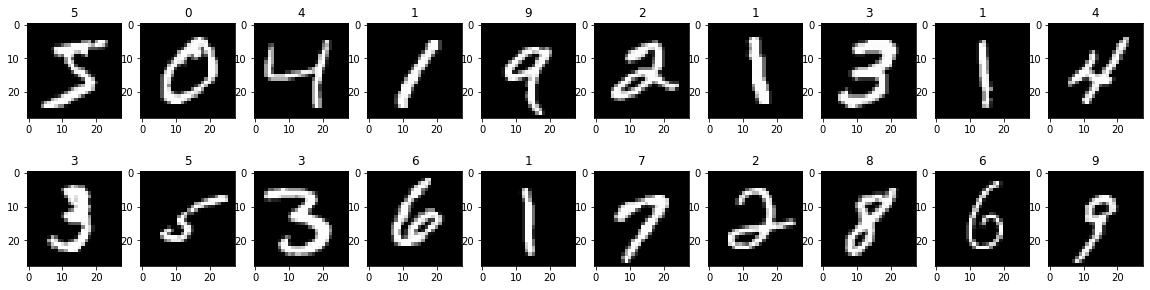

In [7]:
batch_size =20 
fig=plt.figure(figsize=(20,5))
for i in range(20):
    ax=fig.add_subplot(2,batch_size/2,i+1)
    ax.imshow(X_train[i],cmap='gray')
    ax.set_title(y_train[i])

In [8]:
X_train = X_train/255.0
X_test = X_test/255.0

In [10]:
X_train.shape

(60000, 28, 28)

In [9]:
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Flatten
from tensorflow.keras import Model, Input

In [11]:
inp = Input(shape=(28,28))

flat = Flatten()(inp)
print(flat.shape)

hid_1 = Dense(15,activation = 'relu')(flat)
hid_1 = BatchNormalization()(hid_1)
hid_1 = Dropout(rate=0.2)(hid_1)

hid_2 = Dense(15,activation = 'relu')(hid_1)
hid_2 = BatchNormalization()(hid_2)
hid_2 = Dropout(rate=0.2)(hid_2)

out = Dense(10,activation='softmax')(hid_2)

model = Model(inputs=inp, outputs=out)

model.summary()

(None, 784)
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 15)                11775     
_________________________________________________________________
batch_normalization (BatchNo (None, 15)                60        
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                240       
_________________________________________________________________
batch_normalization_1 (Batch (None, 15)   

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train = to_categorical(y_train,10)

y_test = to_categorical(y_test,10)

In [18]:
from tensorflow.keras.optimizers import SGD
import datetime

In [19]:
model.compile(optimizer=SGD(lr=0.01),loss="categorical_crossentropy",metrics=['accuracy'])

logdir = "logs/"+datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = TensorBoard(log_dir=logdir)

AttributeError: module 'datetime' has no attribute 'now'